In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
# Load the dataset
data = pd.read_csv('50_Startups.csv')

# Display the first few rows and summary statistics
print(data.head())
print(data.describe())
print(data.isnull().sum())  # Check for missing values


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.5600

In [27]:
# One-hot encode the 'State' column
data_encoded = pd.get_dummies(data, columns=['State'], drop_first=True)
le = LabelEncoder()
data["State"] = le.fit_transform(data["State"])

# Define features and target variable
X = data_encoded.drop('Profit', axis=1)
y = data_encoded['Profit']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


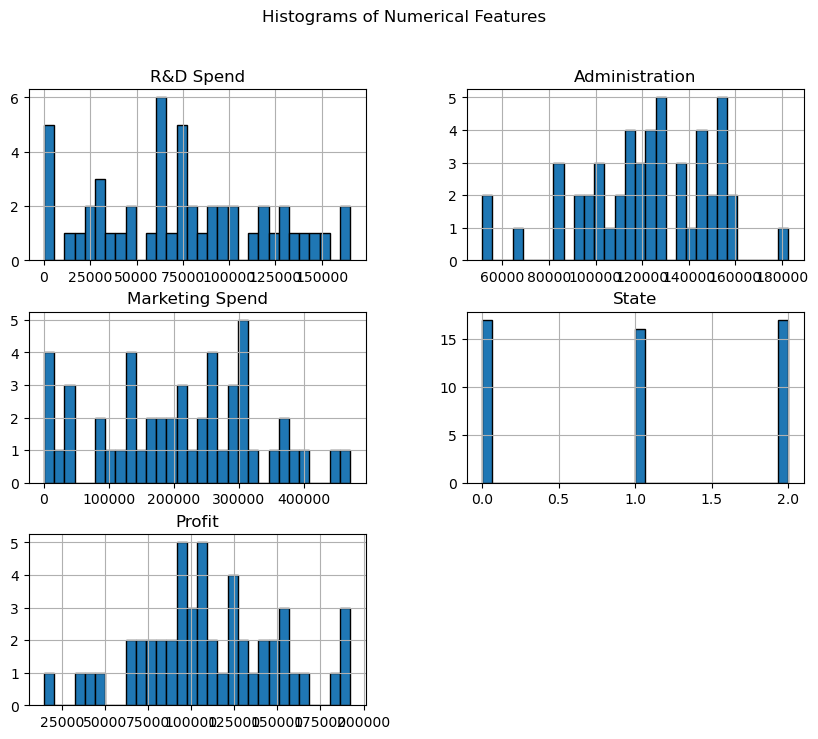

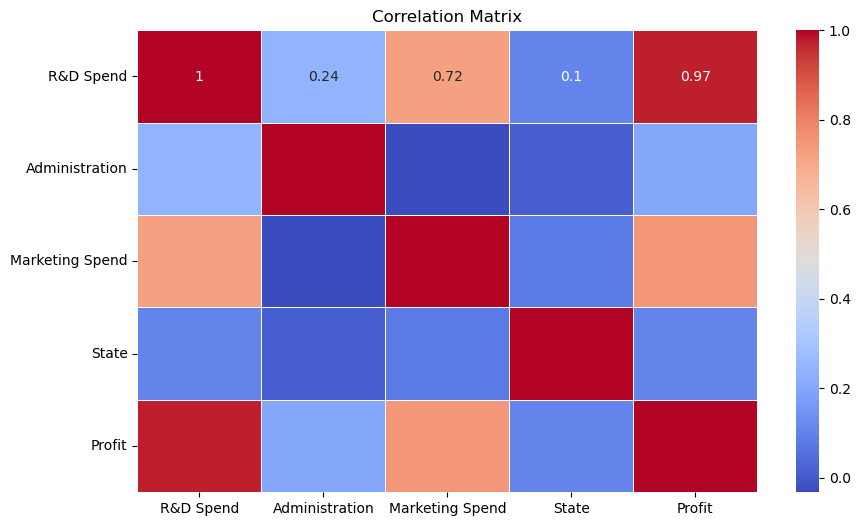

In [29]:
# Histograms for numerical features
data.hist(bins=30, edgecolor='black', figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation matrix to check relationships
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [31]:
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Model 2: Using only R&D Spend and Marketing Spend
model2 = LinearRegression()
X_train_model2 = X_train[['R&D Spend', 'Marketing Spend']]
X_test_model2 = X_test[['R&D Spend', 'Marketing Spend']]
model2.fit(X_train_model2, y_train)

# Model 3: Using all features except Marketing Spend
model3 = LinearRegression()
X_train_model3 = X_train.drop('Marketing Spend', axis=1)
X_test_model3 = X_test.drop('Marketing Spend', axis=1)
model3.fit(X_train_model3, y_train)


LinearRegression()

In [33]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Evaluate each model
mse1, r2_1 = evaluate_model(model1, X_test, y_test)
mse2, r2_2 = evaluate_model(model2, X_test_model2, y_test)
mse3, r2_3 = evaluate_model(model3, X_test_model3, y_test)

print(f"Model 1 (All Features) - MSE: {mse1}, R²: {r2_1}")
print(f"Model 2 (R&D Spend and Marketing Spend) - MSE: {mse2}, R²: {r2_2}")
print(f"Model 3 (All except Marketing Spend) - MSE: {mse3}, R²: {r2_3}")


Model 1 (All Features) - MSE: 82010363.04430114, R²: 0.8987266414328635
Model 2 (R&D Spend and Marketing Spend) - MSE: 67343832.58979608, R²: 0.9168381183550247
Model 3 (All except Marketing Spend) - MSE: 86797850.65841383, R²: 0.8928146452925971


In [35]:
print("Model 1 Coefficients:", model1.coef_)
print("Model 2 Coefficients:", model2.coef_)
print("Model 3 Coefficients:", model3.coef_)


Model 1 Coefficients: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
Model 2 Coefficients: [0.78337431 0.03923979]
Model 3 Coefficients: [ 8.59938106e-01 -9.62782046e-02  2.21466448e+03  5.67611167e+02]
